In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import missingno as msno
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
from os import listdir
from os.path import isfile, join
from collections import Counter

https://www.kaggle.com/jirakst/homecredit-an-approach

In [8]:
data_application = pd.read_csv("csv/application_train.csv")
data_application_test = pd.read_csv("csv/application_test.csv")
# data_bureau = pd.read_csv("csv/bureau.csv")
# data_bureau_balance = pd.read_csv("csv/bureau_balance.csv")
# data_pos_cash_balance = pd.read_csv("csv/POS_CASH_balance.csv")
# data_credit_card_balance = pd.read_csv("csv/credit_card_balance.csv")
# data_installments_payments = pd.read_csv("csv/installments_payments.csv")
# data_previous_application = pd.read_csv("csv/previous_application.csv")

In [9]:
print("data_application : ", data_application.shape)
print("data_application_test : ", data_application_test.shape)
# print("data_bureau : ", data_bureau.shape)
# print("data_bureau_balance : ", data_bureau_balance.shape)
# print("data_credit_card_balance : ", data_credit_card_balance.shape)
# print("data_installments_payments : ", data_installments_payments.shape)
# print("data_previous_application : ", data_previous_application.shape)

data_application :  (307511, 122)
data_application_test :  (48744, 121)


# Analyse exploratoire de data_application

In [10]:
data_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [11]:
data_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data_application.duplicated().sum()

0

Taux de valeurs manquantes

In [13]:
data_application.isnull().sum() / data_application.shape[0] * 100.00

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [14]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [15]:
# Missing values statistics
missing_values = missing_values_table(data_application)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Type de données

In [16]:
# Number of each type of column
data_application.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Nombre de valeurs différentes pour les variables catégorielles

In [17]:
# Number of unique classes in each object column
data_application.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [18]:
data_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Examinons la distribution de la variable Target

<AxesSubplot:>

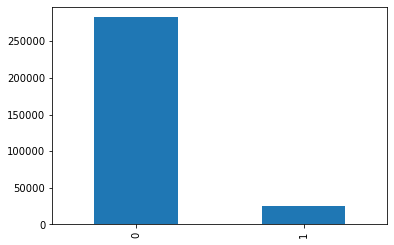

In [19]:
data_application['TARGET'].value_counts().plot(kind = "bar")

In [20]:
# fig = go.Figure(data = [go.Pie(labels = data_application["TARGET"], values = data_application.value_counts())])
# fig.update_layout( title_text = "TARGET")
# fig.show()

On remarque un désquibibre des données, 92% des candidats ont réussi à rembourser leur prêt et 8% sont par défaut

In [21]:
data_application.describe(include = 'object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


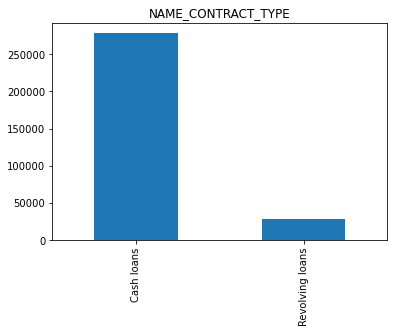

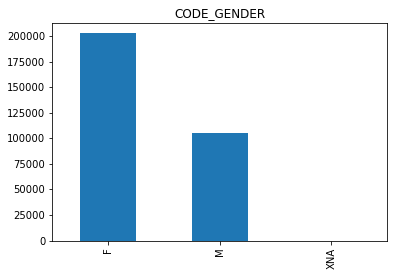

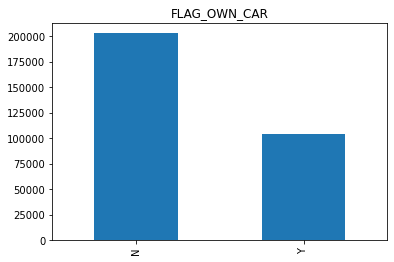

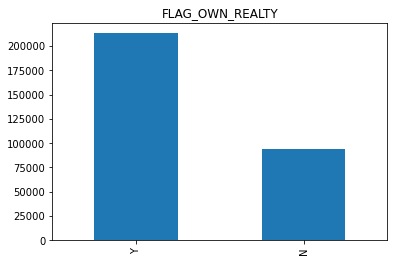

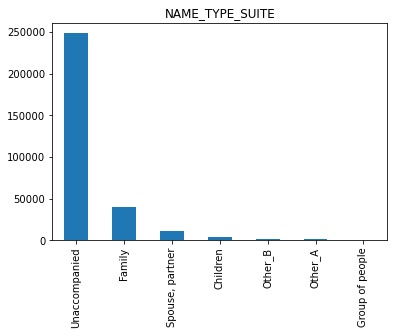

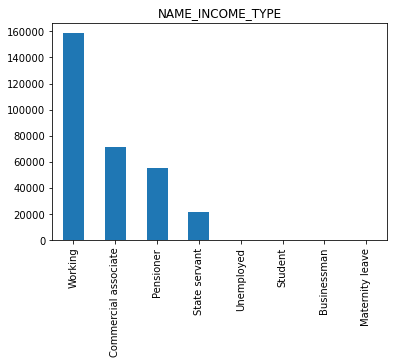

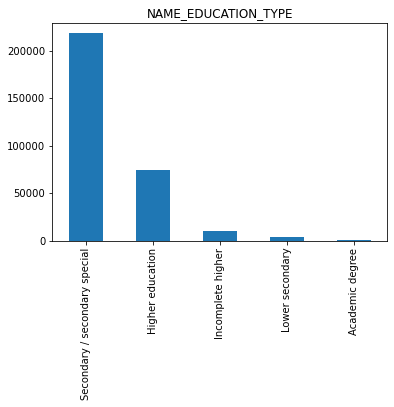

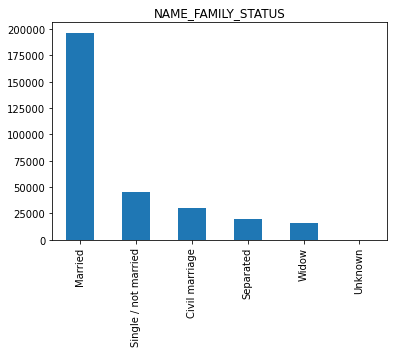

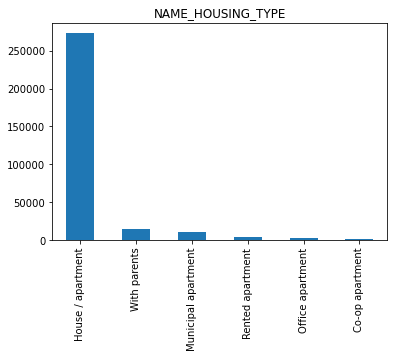

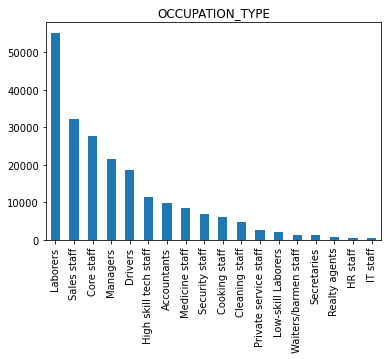

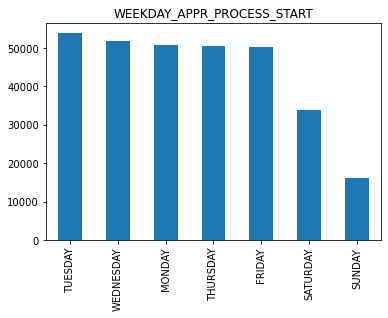

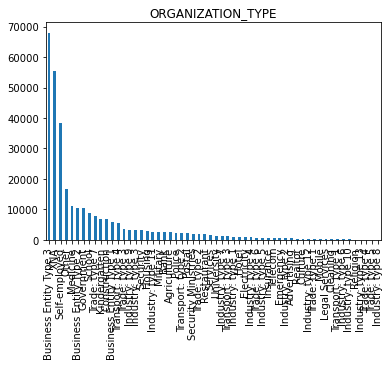

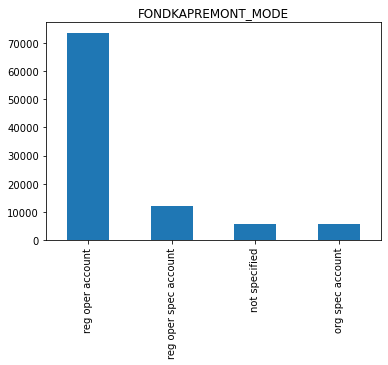

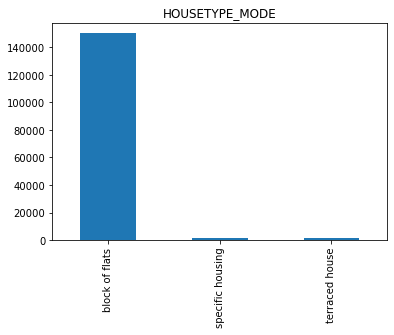

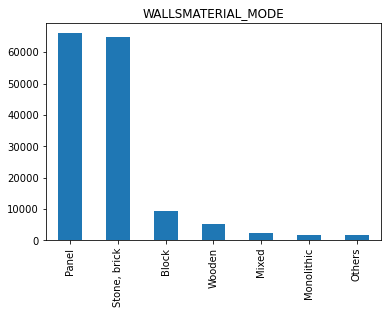

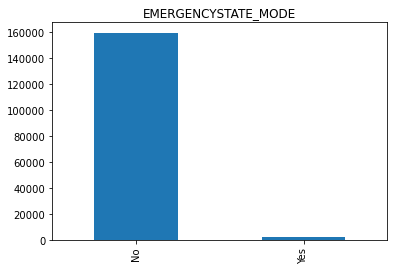

In [22]:
for c in data_application.columns: 
    if data_application[c].dtype == "object":
        data_application[c].value_counts(normalize = False).plot(kind = 'bar')
        plt.title(c)
        plt.show()

In [24]:
# for c in data_application.columns: 
#     if data_application[c].dtype == "object":
#         fig = go.Figure(data = [go.Pie(labels = data_application[c], values = data_application.value_counts())])
#         fig.update_layout( title_text = c)
#         fig.show()

* 81% des demandeurs n'étaient pas accompagnés au moment de la demande de prêt.
* 90% des prêts sont des prêts de trésorerie.
* 66% des candidats ne possèdent pas de voiture.
* 70% des candidats possèdent un logement.
* 75% des demandeurs de prêt sont mariés ou mariés civilement.

* 95% des demandeurs de prêt ont un niveau secondaire ou supérieur.
* 89% des candidats vivent dans une maison ou un appartement.


In [25]:
# for c in data_application:
#     if data_application[c].dtype in ["float64", "int64"]:
#         data_application[[c]].hist()
#         plt.title("histogramme : "+c)
#         plt.show()

* AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE sont biaisés à droite.
* DAYS_REGISTRATION, EXT_SOURCE_2, EXT_SOURCE_3 sont asymétriques.

Regardons maintenant les corrélations. Il y a 122 variables. Nous n'allons regarder ici que les corrélations avec la variable Target. Les 20 corrélation les plus négatives et les 20 corrélations les plus positives

In [26]:
# Find correlations with the target and sort
correlations = data_application.corr()['TARGET'].sort_values()

# Display correlations
print('Top 20 most Positive Correlations:\n', correlations.tail(20))
print('\n Top 20 most Negative Correlations:\n', correlations.head(20))

Top 20 most Positive Correlations:
 OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

 Top 20 most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1       

Valeurs abbérantes

Regardons la variable days_employed

In [27]:
data_application["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Le nombre maximal de jours travaillés est de 1000 ans ce qui est impossible

In [28]:
data_application[data_application['DAYS_EMPLOYED'] == 365243].shape


(55374, 122)

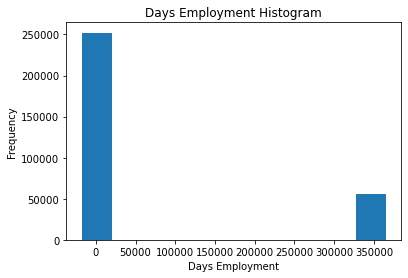

In [29]:
data_application['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Il y a plus de 55374 lignes ayant un nombre de jours travaillés de 365243. Nous allons modifier ces données et les remplir
avec la valeur np.nan

In [30]:
data_application['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

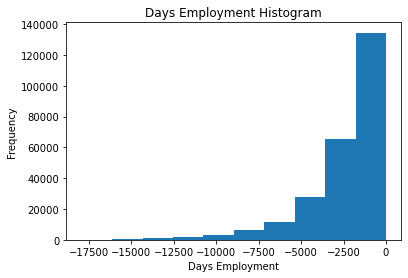

In [31]:
plt.figure(figsize=(6,4))
data_application['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Regardons maintenant la variable DAYS_BIRTH

In [32]:
data_application["DAYS_BIRTH"].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [33]:
(-data_application["DAYS_BIRTH"]/365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Il n'y a pas de valeur abbérante.

In [34]:
data_application['DAYS_BIRTH'] = abs(data_application['DAYS_BIRTH'])
data_application['DAYS_BIRTH'].corr(data_application['TARGET'])

-0.07823930830982712

La corrélation entre la variable days_birth et la variable target est de -0.07. Ce qui indique que plus les clients vieillissent plus ils remboursent le prêt.

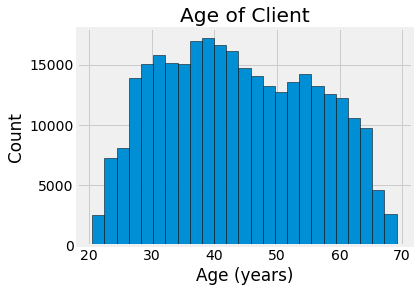

In [35]:
# Plot histogram of age of applicant

# Set the style of plots
plt.figure(figsize=(6,4))
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(data_application['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

Regardons la distribution des âges pour le target 0 et le target 1

Text(0.5, 1.0, 'Distribution of Age by Target Value')

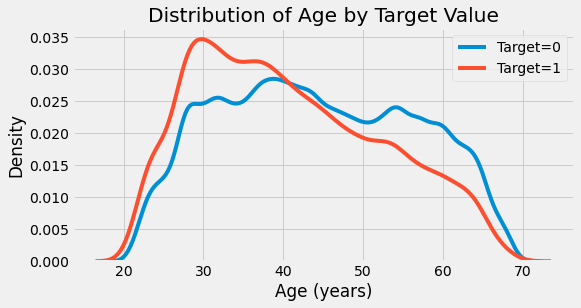

In [36]:
# KDE plot for Age

plt.figure(figsize = (8, 4))

# KDE plot of loans that were repaid on time
sns.kdeplot(data_application.loc[data_application['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Target=0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data_application.loc[data_application['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'Target=1')

# Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density') 
plt.legend()
plt.title('Distribution of Age by Target Value')

La courbe cible == 1 est biaisée vers l'extrémité la plus jeune de la plage. Bien qu'il ne s'agisse pas d'une corrélation significative (coefficient de corrélation de -0,07), cette variable sera probablement utile dans un modèle d'apprentissage automatique car elle affecte la cible. Regardons cette relation sous un autre angle : le non-remboursement moyen des prêts par tranche d'âge.

Pour réaliser ce graphique, nous avons d'abord découpé la catégorie d'âge en tranches de 5 ans chacune. Ensuite, pour chaque case, nous calculons la valeur moyenne de la cible, qui nous indique le ratio de prêts non remboursés dans chaque catégorie d'âge.

In [37]:
# Age information into a separate dataframe
age_data = data_application[['TARGET', 'DAYS_BIRTH']]
age_data = age_data.copy()
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [38]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


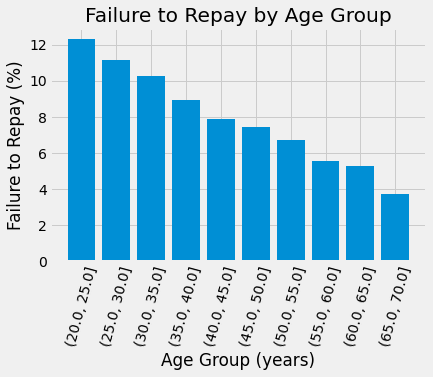

In [39]:
# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75);
plt.xlabel('Age Group (years)');
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

La tendance est claire : les candidats plus jeunes sont plus susceptibles de ne pas rembourser le prêt ! Le taux de non-remboursement est supérieur à 10 % pour les trois tranches d'âge les plus jeunes et inférieur à 5 % pour la tranche d'âge la plus âgée.
    
    

Analysons les variables EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 qui ont des corrélations négatives assez fortes avec la cible.
Regardons tout cela :

In [40]:
# Extract select variables and get correlations
ext_data = data_application[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


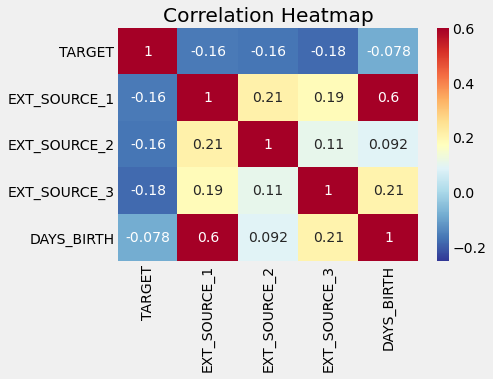

In [41]:
# Correlation Heatmap

plt.figure(figsize = (6, 4))

sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Les 3 variables EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 ont des corrélations négatives avec la cible, ce qui implique que plus la
valeur de EXT_SOURCE augmente plus le client a des chances de rembourser le prêt.

DAYS_BIRTH est positivement corrélée avec la EXT_SOURCE_1 de valeur 0.6.

 
Ensuite, regardons la distribution de chacune de ces fonctionnalités par la valeur de la cible. Cela nous permettra de visualiser l'effet de cette variable sur la cible.

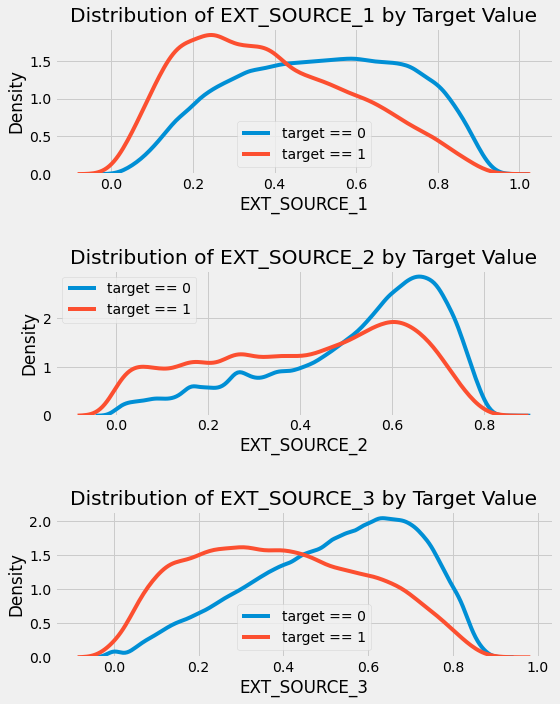

In [42]:
# KDE plots

plt.figure(figsize = (8, 10))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(data_application.loc[data_application['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(data_application.loc[data_application['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 affiche la plus grande différence entre les valeurs de la cible. Nous pouvons clairement voir que cette caractéristique a une certaine relation avec la probabilité qu'un demandeur rembourse un prêt. La relation n'est pas très forte (en fait, elles sont toutes considérées comme très faibles, mais ces variables seront toujours utiles pour un modèle d'apprentissage automatique pour prédire si un demandeur remboursera ou non un prêt à temps.

In [43]:
def detect_outliers(df,n,features):
    '''
    En entrée :
    df : dataframe
    n : nb d'outliers
    features : liste de features
    En sortie
    multiple_outliers : observations avec plus de n outliers
    '''
    
    outlier_indices = []
    
    for col in features:
        Q1 = df[col].quantile(0.02)
        Q3 = df[col].quantile(0.98)
        IQR = Q3 - Q1
        
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR )].index
        outlier_indices.extend(outliers)
        
    # Select observations with more than n outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [44]:
# Return only float64 features
numerical_feature_mask = data_application.dtypes == float
numerical_cols = data_application.columns[numerical_feature_mask].tolist()

In [45]:
# Detect outliers
Outliers_to_drop = detect_outliers(data_application, 2, numerical_cols)

In [46]:
# Number of outliers to drop
len(Outliers_to_drop)

2454

C'est un nombre acceptable

In [47]:
# Remove outliers
data_application.drop(Outliers_to_drop, inplace=True)

# Concaténation des données

In [48]:
# Save Id for the submission at the very end.
Id = data_application_test['SK_ID_CURR']

In [49]:
# Get marker
split = len(data_application)

In [50]:
# Merge into one dataset
data =  pd.concat(objs = [data_application, data_application_test], axis = 0).reset_index(drop = True)

In [51]:
# We don't need the Id anymore now.
data.drop('SK_ID_CURR', axis = 1, inplace = True)

In [52]:
data.shape

(353801, 121)

Gestion des valeurs nulles

In [53]:
# Remove mostly sparse features
for f in data:
    if data[f].isnull().sum() / data.shape[0] >= 0.5:
        del data[f] # Or do a boolean flag here

In [54]:
# Check for TARGET data type
data['TARGET'].dtype

dtype('float64')

In [55]:
# Select columns due to theirs data type
float_col = data.select_dtypes('float').drop(['TARGET'], axis=1)
int_col = data.select_dtypes('int')
object_col = data.select_dtypes('object')

In [56]:
# Remove and impute numerical features
for f in float_col:
    if data[f].isnull().sum() / data.shape[0] > 0.1667: 
        del data[f] # Remove 1/6+ of NANs
    else: 
        data[f] = data[f].fillna(data[f].mean()) # Impute others with a mean value

In [57]:
# Impute default value into a numerical category
for i in int_col:
    data[i] = data[i].fillna(-1)

In [58]:
# Impute object type with a default
for o in object_col:
    data[o] = data[o].fillna('Unknown')

In [59]:
# Check
data.isnull().sum().sort_values(ascending=False).head(5)

TARGET                48744
NAME_CONTRACT_TYPE        0
FLAG_DOCUMENT_8           0
FLAG_DOCUMENT_7           0
FLAG_DOCUMENT_6           0
dtype: int64

Seul le target dans le dataset peut-être rempli de valeurs nan

Encodage des données

In [60]:
data = pd.get_dummies(data, prefix_sep='_', drop_first=True) # Drop originall feature to avoid multi-collinearity

Standardisation des données

Dans le but d'utiliser une analyse en composantes principales, nous allons standardiser nos données

In [61]:
#Split data
train_c = data[:split]
test_c = data[split:].drop(['TARGET'], axis=1)

In [62]:
from sklearn.model_selection import train_test_split

# Get variables for a model
x = train_c.drop(["TARGET"], axis = 1)
y = train_c["TARGET"]

#Do train data splitting
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 101)

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # Fit on training set only.

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [65]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Model

In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'lbfgs').fit(X_train, y_train)
pred = lr.predict(X_test)
acc = lr.score(X_test, y_test)

print("Accuracy: ", acc)

Accuracy:  0.9190767809515296


C:\Users\Jo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Model Evaluation

## Matrice de confusion

In [67]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predicts = cross_val_predict(lr, X_train, y_train, cv=3)
confusion_matrix(y_train, predicts)

C:\Users\Jo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Jo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Jo\anaconda3\lib\site-packages\sklearn\

array([[218718,     17],
       [ 19191,     18]], dtype=int64)

Dans la première ligne, 218718 clients ont été correctement prédits comme n'ayant pas de difficultés de paiement (vrais négatifs) et 17 ont été classés à tort comme n'ayant pas de difficultés de paiement (faux négatifs). Au deuxième rang, 19 192 clients ont été classés à tort en difficulté de paiement (faux positif) et 17 d'entre eux ont été correctement classés en difficulté de paiement (vrai négatif)

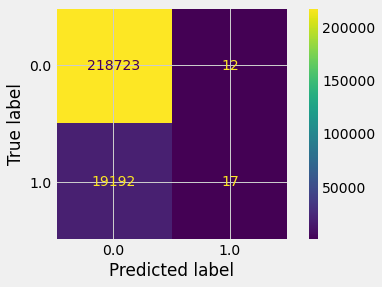

In [68]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_train, y_train) 

## Precision and Recall

In [69]:
from sklearn.metrics import precision_score, recall_score, classification_report

print("Precision:", precision_score(y_train, predicts))
print("Recall:",recall_score(y_train, predicts))

Precision: 0.5142857142857142
Recall: 0.0009370607527721381


La précison nous donne la probabilité qu'à un client d'être classé correctement.

In [70]:
print(classification_report(y_train, predicts))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    218735
         1.0       0.51      0.00      0.00     19209

    accuracy                           0.92    237944
   macro avg       0.72      0.50      0.48    237944
weighted avg       0.89      0.92      0.88    237944



## F1-score

In [71]:
from sklearn.metrics import f1_score

f1_score(y_train, predicts)

0.0018707129494907506

Le score F1 est calculé comme la moyenne harmonique de la précision et du rappel, ainsi un score F1 élevé n'est possible que si la précession et le rappel sont élevés

## Courbe de précision du recall

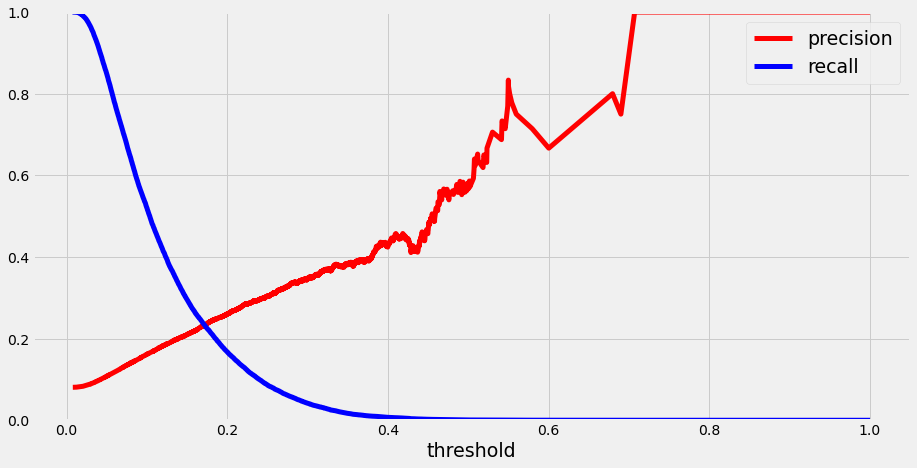

In [72]:
from sklearn.metrics import precision_recall_curve

y_scores = lr.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Sur la base de la chute rapide de la courbe de rappel, il est possible de définir un compromis rappel/précision avant.

## Courbe de ROC

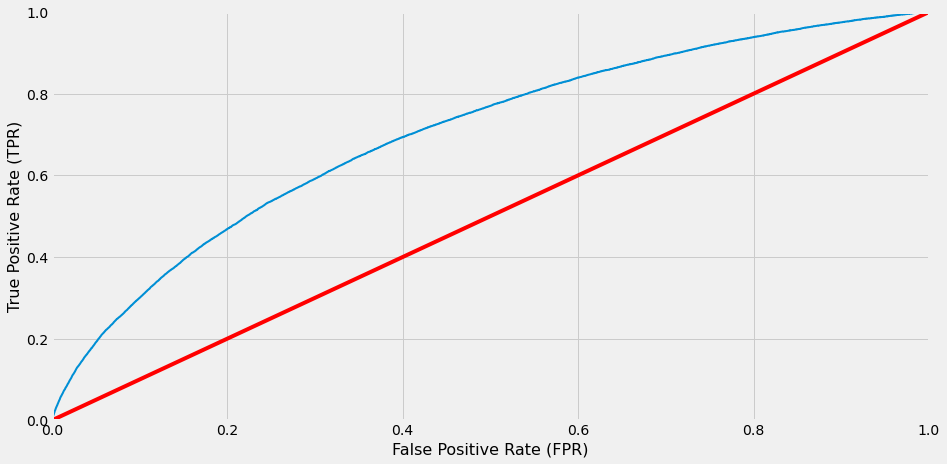

In [78]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

Plus la courbe bleue penche vers le coin supérieur gauche (angle droit), mieux un modèle prédit les résultats réels.

## ROC Score

In [74]:
from sklearn.metrics import roc_auc_score

In [75]:
y_scores = lr.predict_proba(X_train)
y_scores = y_scores[:, 1]

In [76]:
auroc = roc_auc_score(y_train, y_scores)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.7017445439507781
